In [29]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from Bio import SeqIO

sns.set(rc={'figure.figsize':(11,8)})

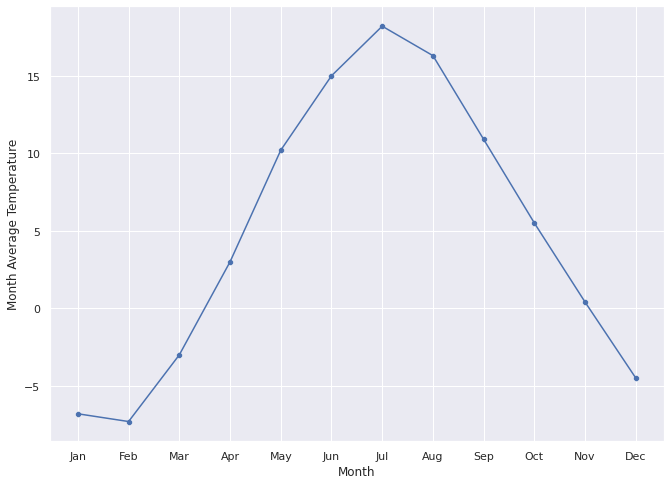

In [27]:
# 1. Draw line plot (by small data)
# Draw average temperature during one year in Viborg (data from there: http://www.pogodaiklimat.ru/climate/22892.htm)

data = [["Jan", -6.8], ["Feb", -7.3], ["Mar", -3],
        ["Apr", 3], ["May", 10.2],  ["Jun", 15],
        ["Jul", 18.2], ["Aug", 16.3], ["Sep", 10.9],
        ["Oct", 5.5], ["Nov", 0.4], ["Dec", -4.5]]

data_pd = pd.DataFrame(data, columns = ["Month", "Month Average Temperature"])
plot = sns.lineplot(data = data_pd, x = "Month", y = "Month Average Temperature")
plot = sns.scatterplot(data = data_pd, x = "Month", y = "Month Average Temperature")
plt.show(plot)

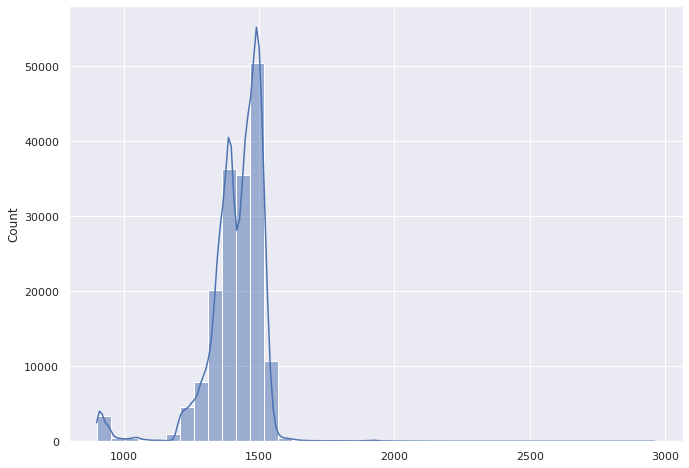

In [21]:
# 2. Draw density plot by length of reads in fasta-file

def length_distribution_in_fasta(file) -> None:
    """Draw density plot by length of reads in fasta-file"""
    data = []
    for record in SeqIO.parse(file, "fasta"):
        data.append(len(record))
    sns.histplot(data, bins=40, kde = True)

    
length_distribution_in_fasta("/home/alexey/tax_n_refs/silva_132_97_16S.fna")

<AxesSubplot:title={'center':'Variation in samples in different locations - OTU number'}>

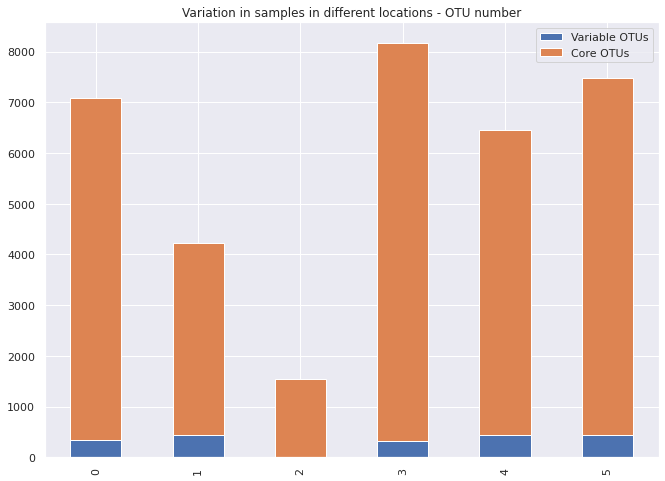

In [60]:
# 3. Plot my favorite graph
# Plot 

data = '/home/alexey/Analysis/2020_Borovichi/data.csv'
res = []
with open(data, 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        res.append(row)
res_pd = pd.DataFrame(data = res[1:], columns = res[0])
res_pd["Variable OTUs"] = pd.to_numeric(res_pd["Variable OTUs"])
res_pd["Core OTUs"] = pd.to_numeric(res_pd["Core OTUs"])

res_pd.plot(kind='bar', stacked=True, title = "Variation in samples in different locations - OTU number")